In [1]:

import importlib
import os
import misinfo_tsne
import pickle

importlib.reload(misinfo_tsne)
from misinfo_tsne import Classifier, FAM, MisinfoTsneAnalyzer, get_device

THe Following Cell is for investigating the performance of the t-SNE clustering using FAM Embeddings

In [2]:

raw_data_path = "final_data.csv"
model_type = "fam"
embeds_path = "models_and_objects/cls_emb.pkl"
features_embeds_path = "models_and_objects/feature_vectors.pkl"
model_data_temp = .7


analyzer = MisinfoTsneAnalyzer(
    raw_data_path=raw_data_path,
    model_type=model_type,
    embeds_path=embeds_path,
    features_embeds_path=features_embeds_path,
    model_data_temp=model_data_temp
)

analyzer.search_tsne_param_space(
    silhouette_sample=500,
    n_iter=10,
    verbose=True
)

/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE computation complete
Run 1/10 - Silhouette score: -0.018154988065361977
New best silhouette score: -0.018154988065361977


/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


t-SNE computation complete
Run 2/10 - Silhouette score: -0.020015861839056015


/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE computation complete
Run 3/10 - Silhouette score: -0.019236518070101738


/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE computation complete
Run 4/10 - Silhouette score: -0.019237108528614044


/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE computation complete
Run 5/10 - Silhouette score: -0.018407676368951797


/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE computation complete
Run 6/10 - Silhouette score: -0.018158670514822006


/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE computation complete
Run 7/10 - Silhouette score: -0.020935986191034317


/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE computation complete
Run 8/10 - Silhouette score: -0.019473670050501823


/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE computation complete
Run 9/10 - Silhouette score: -0.019107181578874588


/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE computation complete
Run 10/10 - Silhouette score: -0.01743740774691105
New best silhouette score: -0.01743740774691105
Best silhouette score: -0.01743740774691105 with parameters:
{'perplexity': 5, 'n_iter': 1000, 'n_components': 2, 'metric': 'euclidean', 'method': 'barnes_hut', 'learning_rate': 1000, 'init': 'pca', 'early_exaggeration': 4, 'angle': 0.5}

Results saved to: tsne_models_objects_and_results/tsne_search_results.csv


The following cell is used for investigating t-SNE clustering performance using the pre-trained BERT embeddings.

/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Silhouette score: -0.018012572079896927


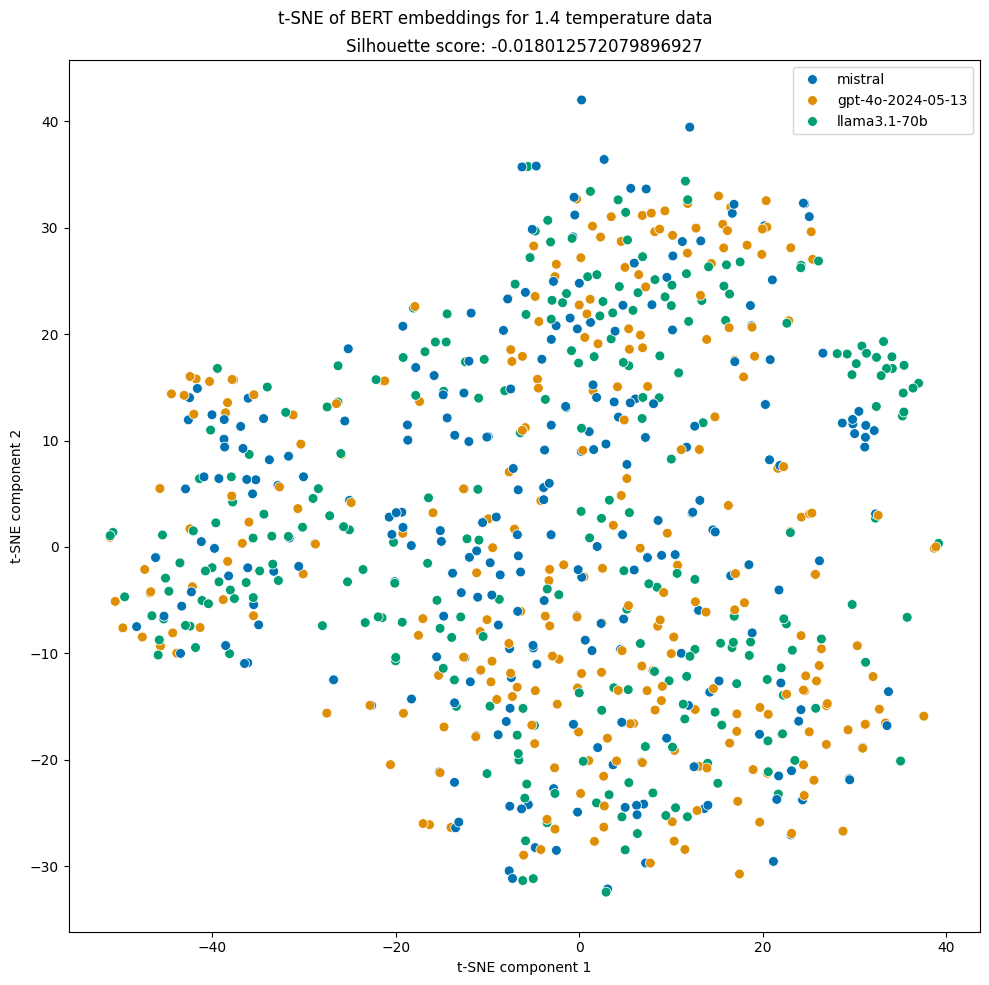

In [19]:

import importlib
import os
import misinfo_tsne
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel
importlib.reload(misinfo_tsne)

def get_embeddings(sentences, model, tokenizer, device, batch_size=16):
    """
    Returns the embeddings of the input sentences using the specified model and tokenizer.
    """
    model.to(device)
    embeddings_list = []
    
    for i in range(0, len(sentences), batch_size):
        batch_sentences = sentences[i:i + batch_size]
        inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors='pt').to(device)
        with torch.no_grad():
            outputs = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])
        embeddings = outputs[0]  # Get the last_hidden_state
        sentence_embeddings = embeddings.mean(dim=1)
        embeddings_list.append(sentence_embeddings.cpu())

    return torch.cat(embeddings_list)

data_path = "final_data.csv"

df = pd.read_csv(data_path)

#limit data to that with temperature 
df = df[df['temperature'] == 1.4]

df_sample = df.sample(800, random_state=42)
device = get_device()
X_sampled_data_vis = df_sample['response_text'].values
model_labels = df_sample['model'].values
label_encoder = LabelEncoder()
y_sampled_data_vis_encoded = label_encoder.fit_transform(model_labels)
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name).to(device)
vis_encodings = tokenizer(list(X_sampled_data_vis), padding=True, truncation=True, return_tensors='pt').to(device)
vis_encodings = {k: v.to(device) for k, v in vis_encodings.items()}
vis_labels = torch.tensor(y_sampled_data_vis_encoded).to(device)
model.eval()
sentence_embeddings = get_embeddings(list(X_sampled_data_vis), model, tokenizer, device)
tsne_params = {'n_components': 2, 'perplexity': 30, 'n_iter': 1000, 'random_state': 42}
tsne = TSNE(**tsne_params)
test_embeddings_2d = tsne.fit_transform(sentence_embeddings.cpu().numpy())

vis_df = pd.DataFrame(test_embeddings_2d, columns=['x', 'y'])
vis_df['model'] = model_labels
vis_df['temperature'] = df_sample['temperature'].values

silhouette_score_x = vis_df[['x', 'y']].values
silhouette_labels = vis_df['model'].values
silhouette_sample = 500
score = silhouette_score(silhouette_score_x, silhouette_labels, sample_size=silhouette_sample, random_state=42)
print(f"Silhouette score: {score}")


plt.figure(figsize=(10, 10))
sns.scatterplot(data=vis_df, x='x', y='y', hue='model', palette='colorblind', s=50)
plt.suptitle('t-SNE of BERT embeddings for 1.4 temperature data')
plt.title(f'Silhouette score: {score}')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(loc='upper right')
plt.tight_layout()
filepath = "tsne_models_objects_and_results/bert_tsne_plot_14.png"
plt.savefig(filepath)

plt.show()

The following cell is used 

/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/aaronrdankert/Desktop/milestone_2_master/misinfo_tsne.py:476: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/aaronrdankert/Desktop/milestone_2_master/.venv/lib/python3.11/site-packages/

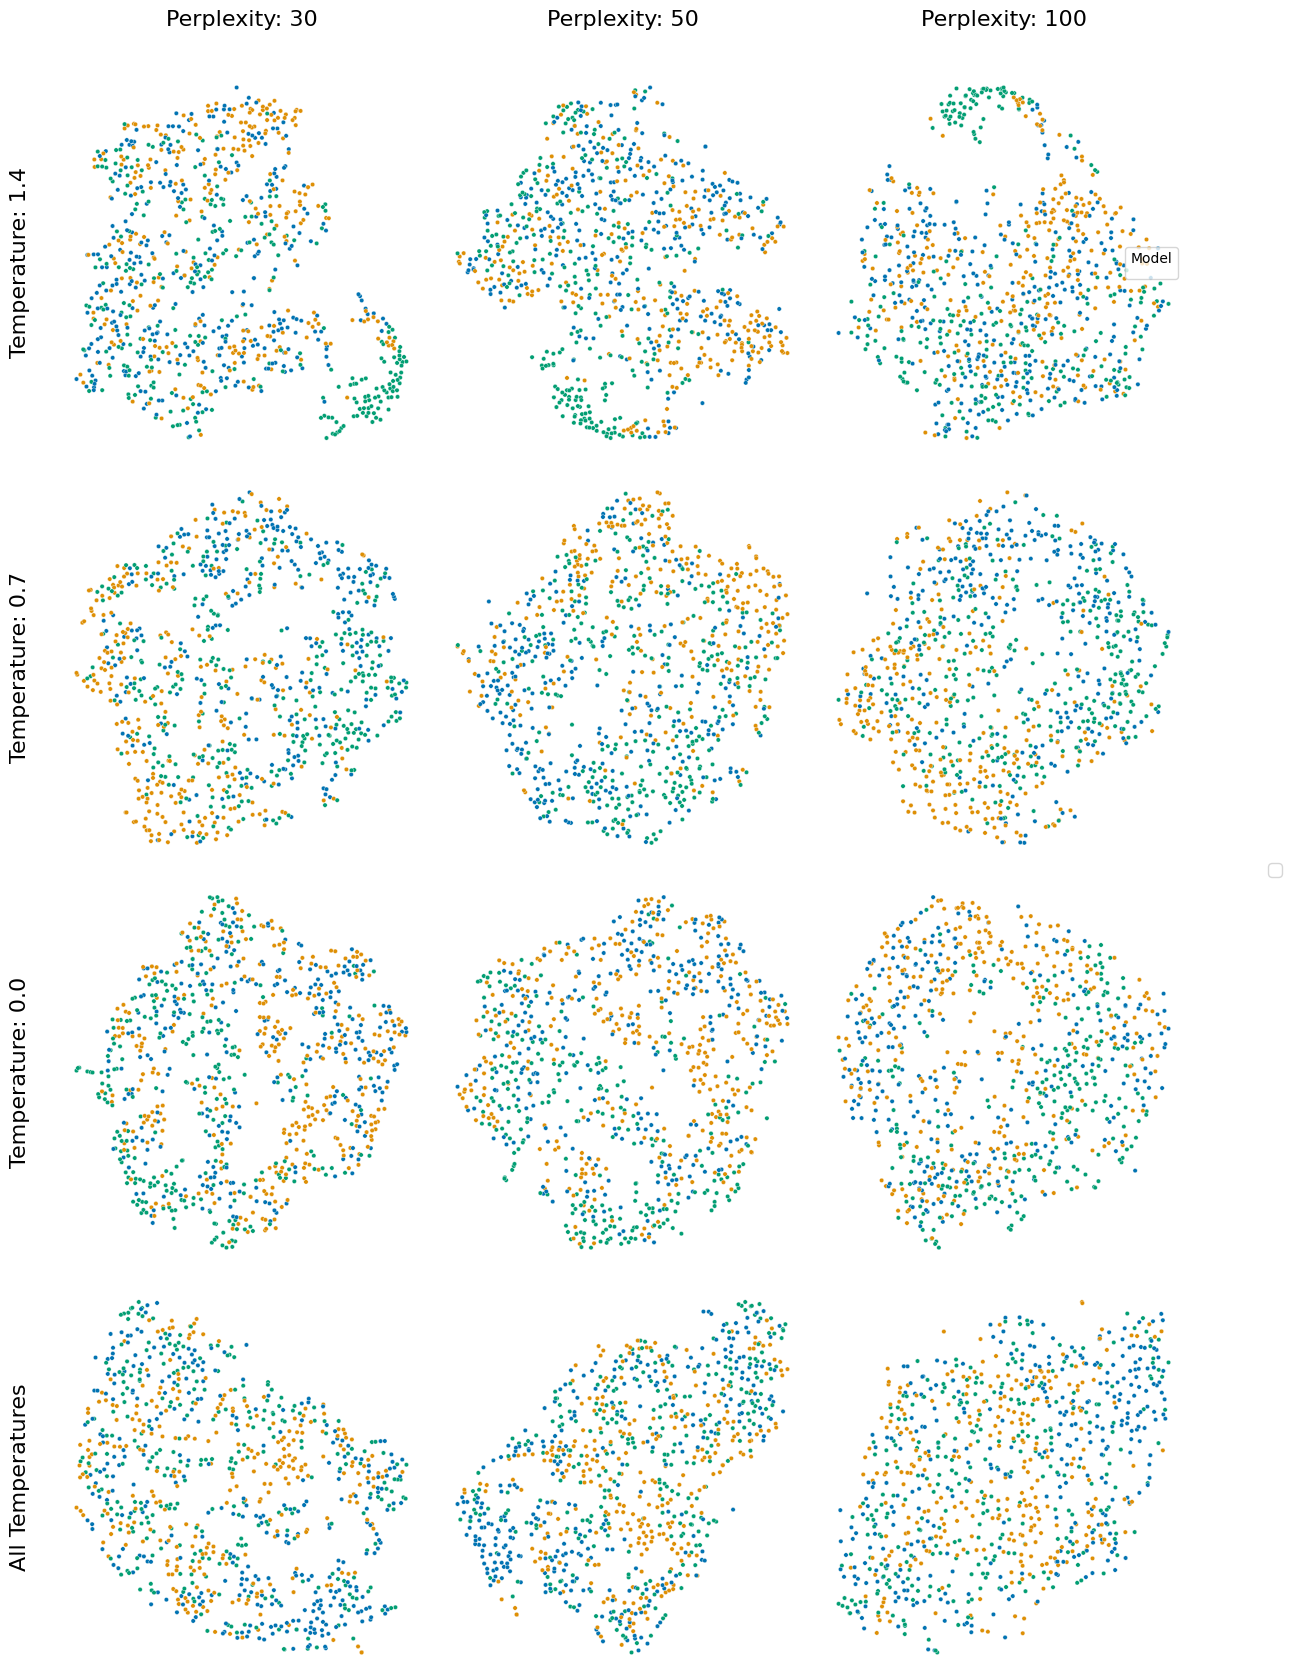

Grid plot saved to tsne_grid_plots/tsne_grid_plot.png


In [21]:
import importlib
importlib.reload(misinfo_tsne)
from misinfo_tsne import TsneGridPlotter

raw_data_path = "final_data.csv"
embeds_path = "models_and_objects/cls_emb.pkl"
features_embeds_path = "models_and_objects/feature_vectors.pkl"
model_path_template = "models_and_objects/temp_{}_models.pth"


plotter = TsneGridPlotter(
    raw_data_path=raw_data_path,
    embeds_path=embeds_path,
    features_embeds_path=features_embeds_path,
    model_path_template=model_path_template,
    output_dir="tsne_grid_plots",
    random_state=42
)


plotter.create_grid_plot()